In [14]:
!pip install zstandard
!pip install python-louvain
!pip install community

In [15]:
import os
import zstandard as zstd
import xml.etree.ElementTree as ET
import community as community_louvain


In [16]:
# Path to the uploaded file
compressed_file_path = '/content/network.xml.zst'
decompressed_file_path = '/content/network.xml'

# Decompress the file
with open(compressed_file_path, 'rb') as compressed_file, open(decompressed_file_path, 'wb') as decompressed_file:
    dctx = zstd.ZstdDecompressor()
    dctx.copy_stream(compressed_file, decompressed_file)

# Check the size of the decompressed file
os.path.getsize(decompressed_file_path)


1549340

In [17]:

def count_nodes_and_edges(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # Customize based on your XML structure
    nodes = root.findall('.//node')  # Adjust the tag 'node' based on your XML
    edges = root.findall('.//edge')  # Adjust the tag 'edge' based on your XML

    return len(nodes), len(edges)


decompressed_file_path = '/content/network.xml'
node_count, edge_count = count_nodes_and_edges(decompressed_file_path)

print(f"Nodes: {node_count}, Edges: {edge_count}")

Nodes: 0, Edges: 0


In [18]:
import xml.etree.ElementTree as ET

# Function to read and parse the XML file
def read_xml(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Print out the root element
    print(f"Root element: {root.tag}")

    # Iterate through the elements and print their tags and attributes
    for elem in root.iter():
        print(f"Tag: {elem.tag}, Attributes: {elem.attrib}, Text: {elem.text}")

# Example usage
file_path = '/content/network.xml'
read_xml(file_path)


Streaming output truncated to the last 5000 lines.
Tag: {http://graphml.graphdrawing.org/xmlns}edge, Attributes: {'id': 'e16590', 'source': 'n1289', 'target': 'n813'}, Text: 
    
Tag: {http://graphml.graphdrawing.org/xmlns}edge, Attributes: {'id': 'e16591', 'source': 'n1289', 'target': 'n955'}, Text: 
    
Tag: {http://graphml.graphdrawing.org/xmlns}edge, Attributes: {'id': 'e16592', 'source': 'n1289', 'target': 'n1066'}, Text: 
    
Tag: {http://graphml.graphdrawing.org/xmlns}edge, Attributes: {'id': 'e16593', 'source': 'n1289', 'target': 'n962'}, Text: 
    
Tag: {http://graphml.graphdrawing.org/xmlns}edge, Attributes: {'id': 'e16594', 'source': 'n1289', 'target': 'n1040'}, Text: 
    
Tag: {http://graphml.graphdrawing.org/xmlns}edge, Attributes: {'id': 'e16595', 'source': 'n1290', 'target': 'n1454'}, Text: 
    
Tag: {http://graphml.graphdrawing.org/xmlns}edge, Attributes: {'id': 'e16596', 'source': 'n1292', 'target': 'n1158'}, Text: 
    
Tag: {http://graphml.graphdrawing.org/xmln

In [21]:
# Define namespaces
namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

# Count nodes
nodes = root.findall(".//graphml:node", namespaces)
node_count = len(nodes)

# Count edges
edges = root.findall(".//graphml:edge", namespaces)
edge_count = len(edges)

node_count, edge_count

NameError: name 'root' is not defined

In [22]:
import xml.etree.ElementTree as ET

# Function to count nodes and edges in a GraphML file
def count_nodes_edges(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Count nodes
    nodes = root.findall(".//graphml:node", namespaces)
    node_count = len(nodes)

    # Count edges
    edges = root.findall(".//graphml:edge", namespaces)
    edge_count = len(edges)

    return node_count, edge_count

# Example usage
file_path = '/content/network.xml'
node_count, edge_count = count_nodes_edges(file_path)
print(f"Number of nodes: {node_count}")
print(f"Number of edges: {edge_count}")


Number of nodes: 1490
Number of edges: 19090


Number of nodes: 1490
Number of edges: 19090


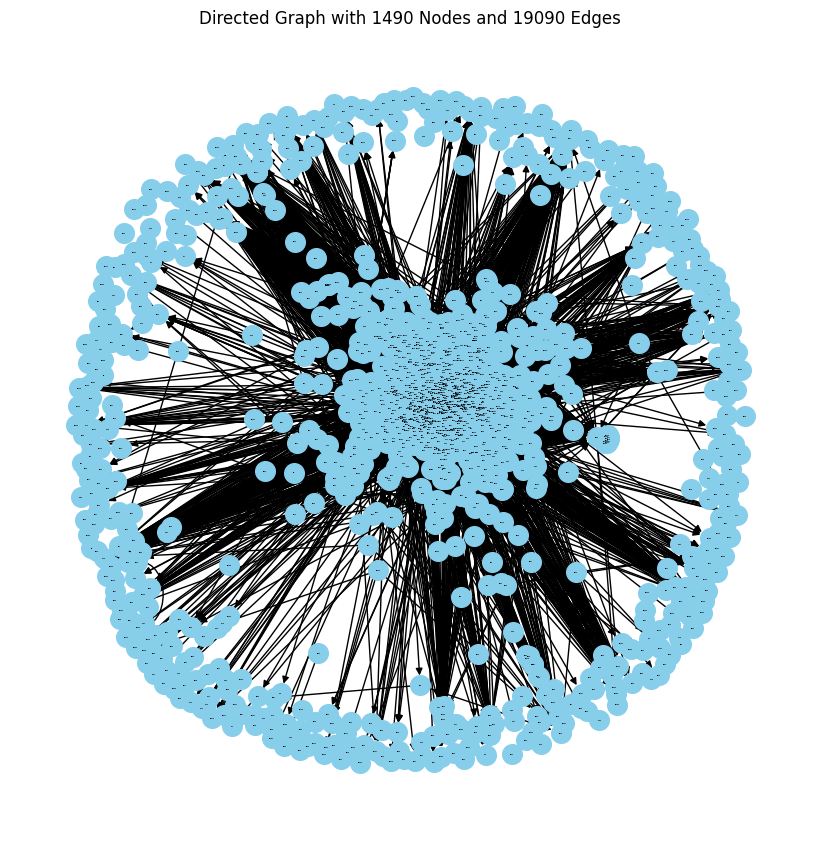

Number of nodes: 1490
Number of edges: 19025


In [23]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

# Function to count nodes and edges in a GraphML file and visualize it as a directed graph
def load_and_visualize_directed_graph(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Create a NetworkX directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = root.findall(".//graphml:node", namespaces)
    for node in nodes:
        node_id = node.get('id')
        G.add_node(node_id)

    # Add directed edges to the graph
    edges = root.findall(".//graphml:edge", namespaces)
    for edge in edges:
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)

    # Print the number of nodes and edges
    node_count = len(nodes)
    edge_count = len(edges)
    print(f"Number of nodes: {node_count}")
    print(f"Number of edges: {edge_count}")

    # Visualize the directed graph using matplotlib
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G)  # Layout to position nodes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=1, font_weight='bold', arrows=True)
    plt.title(f"Directed Graph with {node_count} Nodes and {edge_count} Edges")
    plt.show()


file_path = 'network.xml'
load_and_visualize_directed_graph(file_path)


In [24]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

# Function to calculate and print graph metrics
def calculate_graph_metrics(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Create a NetworkX directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = root.findall(".//graphml:node", namespaces)
    for node in nodes:
        node_id = node.get('id')
        G.add_node(node_id)

    # Add directed edges to the graph
    edges = root.findall(".//graphml:edge", namespaces)
    for edge in edges:
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)

    # Metrics calculations
    # 1. Average degree
    avg_degree = sum(dict(G.degree()).values()) / len(G)
    print(f"Average Degree: {avg_degree:.2f}")

    # 2. Network diameter (maximum distance between any two nodes)
    if nx.is_weakly_connected(G):
        diameter = nx.diameter(G.to_undirected())
        print(f"Network Diameter: {diameter}")
    else:
        print("Graph is not weakly connected, diameter cannot be calculated.")

    # 3. Graph density
    density = nx.density(G)
    print(f"Graph Density: {density:.4f}")

    # 4. Connected Components (for directed graph, weakly and strongly connected)
    weakly_connected_components = list(nx.weakly_connected_components(G))
    strongly_connected_components = list(nx.strongly_connected_components(G))
    print(f"Number of Weakly Connected Components: {len(weakly_connected_components)}")
    print(f"Number of Strongly Connected Components: {len(strongly_connected_components)}")

    # 5. Degree centrality
    degree_centrality = nx.degree_centrality(G)
    print(f"Degree Centrality of nodes: {degree_centrality}")

    # 6. Indegree and Outdegree
    indegree = G.in_degree()
    outdegree = G.out_degree()
    print(f"Indegree of nodes: {dict(indegree)}")
    print(f"Outdegree of nodes: {dict(outdegree)}")

    # 7. Betweenness centrality
    betweenness = nx.betweenness_centrality(G)
    print(f"Betweenness Centrality: {betweenness}")

    # 8. Closeness centrality
    closeness = nx.closeness_centrality(G)
    print(f"Closeness Centrality: {closeness}")

    # 9. PageRank
    pagerank = nx.pagerank(G)
    print(f"PageRank of nodes: {pagerank}")

    # 10. HITS (Hub and Authority Scores)
    hubs, authorities = nx.hits(G)
    print(f"Hub Scores: {hubs}")
    print(f"Authority Scores: {authorities}")

# Example usage
file_path = '/content/network.xml'
calculate_graph_metrics(file_path)


Average Degree: 25.54
Graph is not weakly connected, diameter cannot be calculated.
Graph Density: 0.0086
Number of Weakly Connected Components: 268
Number of Strongly Connected Components: 688
Degree Centrality of nodes: {'n0': 0.01813297515110813, 'n1': 0.03223640026863667, 'n2': 0.0, 'n3': 0.0, 'n4': 0.002686366689053056, 'n5': 0.000671591672263264, 'n6': 0.000671591672263264, 'n7': 0.02552048354600403, 'n8': 0.005372733378106112, 'n9': 0.01007387508394896, 'n10': 0.000671591672263264, 'n11': 0.002686366689053056, 'n12': 0.04231027535258563, 'n13': 0.05977165883143049, 'n14': 0.04701141705842848, 'n15': 0.03626595030221626, 'n16': 0.001343183344526528, 'n17': 0.03223640026863667, 'n18': 0.002686366689053056, 'n19': 0.008730691739422432, 'n20': 0.03223640026863667, 'n21': 0.017461383478844864, 'n22': 0.0651443922095366, 'n23': 0.03895231699126931, 'n24': 0.0, 'n25': 0.000671591672263264, 'n26': 0.02350570852921424, 'n27': 0.008059100067159167, 'n28': 0.04231027535258563, 'n29': 0.000

In [25]:
import xml.etree.ElementTree as ET
import networkx as nx
import pandas as pd

# Function to calculate and save graph metrics to an Excel file
def calculate_and_save_metrics(file_path, output_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Create a NetworkX directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = root.findall(".//graphml:node", namespaces)
    for node in nodes:
        node_id = node.get('id')
        G.add_node(node_id)

    # Add directed edges to the graph
    edges = root.findall(".//graphml:edge", namespaces)
    for edge in edges:
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)

    # Prepare the results dictionary
    metrics = {}

    # 1. Average degree
    avg_degree = sum(dict(G.degree()).values()) / len(G)
    metrics['Average Degree'] = avg_degree

    # 2. Network diameter (for weakly connected graph)
    if nx.is_weakly_connected(G):
        diameter = nx.diameter(G.to_undirected())
        metrics['Network Diameter'] = diameter
    else:
        metrics['Network Diameter'] = 'N/A'

    # 3. Graph density
    density = nx.density(G)
    metrics['Graph Density'] = density

    # 4. Connected Components (Weakly and Strongly connected)
    weakly_connected_components = list(nx.weakly_connected_components(G))
    strongly_connected_components = list(nx.strongly_connected_components(G))
    metrics['Weakly Connected Components'] = len(weakly_connected_components)
    metrics['Strongly Connected Components'] = len(strongly_connected_components)

    # 5. Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    metrics['Degree Centrality'] = str(degree_centrality)

    # 6. Indegree and Outdegree
    indegree = dict(G.in_degree())
    outdegree = dict(G.out_degree())
    metrics['Indegree'] = str(indegree)
    metrics['Outdegree'] = str(outdegree)

    # 7. Betweenness Centrality
    betweenness = nx.betweenness_centrality(G)
    metrics['Betweenness Centrality'] = str(betweenness)

    # 8. Closeness Centrality
    closeness = nx.closeness_centrality(G)
    metrics['Closeness Centrality'] = str(closeness)

    # 9. PageRank
    pagerank = nx.pagerank(G)
    metrics['PageRank'] = str(pagerank)

    # 10. HITS (Hub and Authority Scores)
    hubs, authorities = nx.hits(G)
    metrics['Hub Scores'] = str(hubs)
    metrics['Authority Scores'] = str(authorities)

    # Convert the metrics dictionary to a pandas DataFrame
    df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])

    # Save the DataFrame to an Excel file
    df.to_excel(output_path, index=False)

    print(f"Metrics have been saved to {output_path}")

# Example usage
file_path = 'network.xml'
output_path = 'graph_metrics.xlsx'
calculate_and_save_metrics(file_path, output_path)


Metrics have been saved to graph_metrics.xlsx


In [26]:
import xml.etree.ElementTree as ET
import networkx as nx
import pandas as pd

# Function to calculate and save the key metrics to a separate Excel file
def calculate_and_save_metrics_separately(file_path, output_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Create a NetworkX directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = root.findall(".//graphml:node", namespaces)
    for node in nodes:
        node_id = node.get('id')
        G.add_node(node_id)

    # Add directed edges to the graph
    edges = root.findall(".//graphml:edge", namespaces)
    for edge in edges:
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)

    # Calculate the metrics
    # 1. Degree Centrality
    degree_centrality = nx.degree_centrality(G)

    # 2. Indegree and Outdegree
    indegree = dict(G.in_degree())
    outdegree = dict(G.out_degree())

    # 3. Betweenness Centrality
    betweenness = nx.betweenness_centrality(G)

    # 4. Closeness Centrality
    closeness = nx.closeness_centrality(G)

    # 5. PageRank
    pagerank = nx.pagerank(G)

    # 6. HITS (Hub and Authority Scores)
    hubs, authorities = nx.hits(G)

    # Create a DataFrame for storing the metrics for each node
    data = {
        'Node': list(G.nodes),
        'Degree Centrality': [degree_centrality[node] for node in G.nodes],
        'Indegree': [indegree.get(node, 0) for node in G.nodes],
        'Outdegree': [outdegree.get(node, 0) for node in G.nodes],
        'Betweenness Centrality': [betweenness.get(node, 0) for node in G.nodes],
        'Closeness Centrality': [closeness.get(node, 0) for node in G.nodes],
        'PageRank': [pagerank.get(node, 0) for node in G.nodes],
        'Hub Scores': [hubs.get(node, 0) for node in G.nodes],
        'Authority Scores': [authorities.get(node, 0) for node in G.nodes],
    }

    # Convert the data into a pandas DataFrame
    df = pd.DataFrame(data)

    # Save the DataFrame to an Excel file
    df.to_excel(output_path, index=False)

    print(f"Metrics have been saved to {output_path}")

# Example usage
file_path = 'network.xml'
output_path = 'node_metrics.xlsx'
calculate_and_save_metrics_separately(file_path, output_path)


Metrics have been saved to node_metrics.xlsx


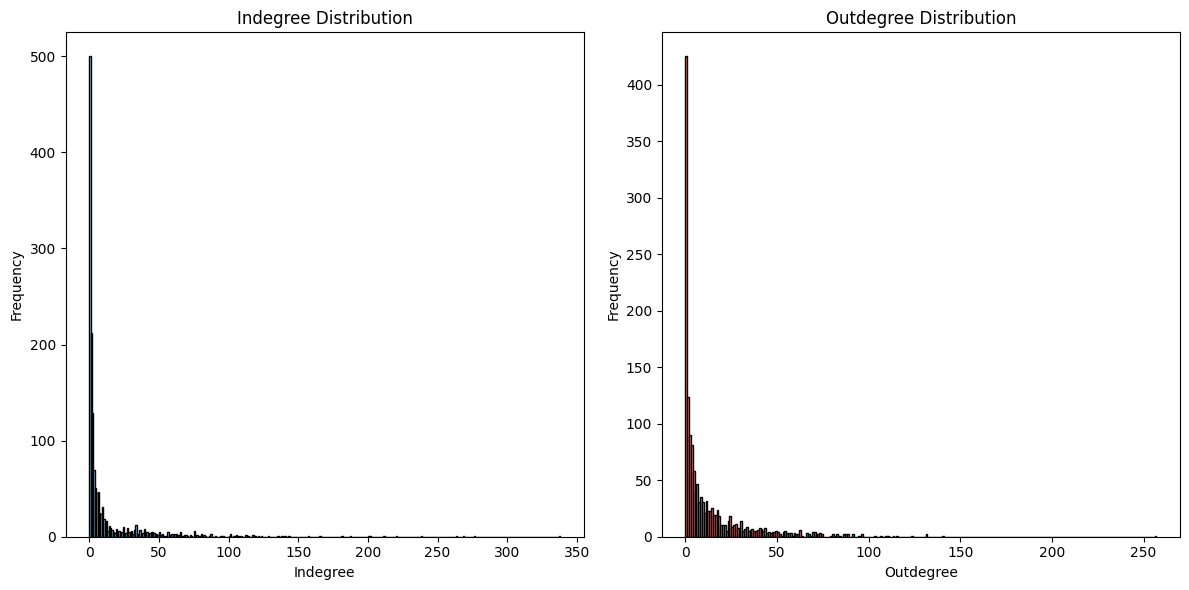

In [27]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

# Function to calculate and draw Degree Distribution (Indegree & Outdegree)
def draw_degree_distribution(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Create a NetworkX directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = root.findall(".//graphml:node", namespaces)
    for node in nodes:
        node_id = node.get('id')
        G.add_node(node_id)

    # Add directed edges to the graph
    edges = root.findall(".//graphml:edge", namespaces)
    for edge in edges:
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)

    # Get Indegree and Outdegree of all nodes
    indegree = dict(G.in_degree())
    outdegree = dict(G.out_degree())

    # Plot Indegree Distribution
    plt.figure(figsize=(12, 6))

    # Indegree Distribution Plot
    plt.subplot(1, 2, 1)
    plt.hist(list(indegree.values()), bins=range(min(indegree.values()), max(indegree.values()) + 2), color='skyblue', edgecolor='black')
    plt.title("Indegree Distribution")
    plt.xlabel("Indegree")
    plt.ylabel("Frequency")

    # Outdegree Distribution Plot
    plt.subplot(1, 2, 2)
    plt.hist(list(outdegree.values()), bins=range(min(outdegree.values()), max(outdegree.values()) + 2), color='lightcoral', edgecolor='black')
    plt.title("Outdegree Distribution")
    plt.xlabel("Outdegree")
    plt.ylabel("Frequency")

    # Show the plots
    plt.tight_layout()
    plt.show()

# Example usage
file_path = 'network.xml'
draw_degree_distribution(file_path)


**Phân Cụm**

Node to Community Mapping:
Node n0 is in community 0
Node n1 is in community 0
Node n2 is in community 1
Node n3 is in community 2
Node n4 is in community 3
Node n5 is in community 0
Node n6 is in community 0
Node n7 is in community 0
Node n8 is in community 0
Node n9 is in community 0
Node n10 is in community 4
Node n11 is in community 5
Node n12 is in community 0
Node n13 is in community 0
Node n14 is in community 0
Node n15 is in community 0
Node n16 is in community 5
Node n17 is in community 0
Node n18 is in community 5
Node n19 is in community 0
Node n20 is in community 0
Node n21 is in community 0
Node n22 is in community 0
Node n23 is in community 0
Node n24 is in community 7
Node n25 is in community 0
Node n26 is in community 0
Node n27 is in community 0
Node n28 is in community 0
Node n29 is in community 5
Node n30 is in community 0
Node n31 is in community 0
Node n32 is in community 0
Node n33 is in community 0
Node n34 is in community 0
Node n35 is in community 0
Node n36 is

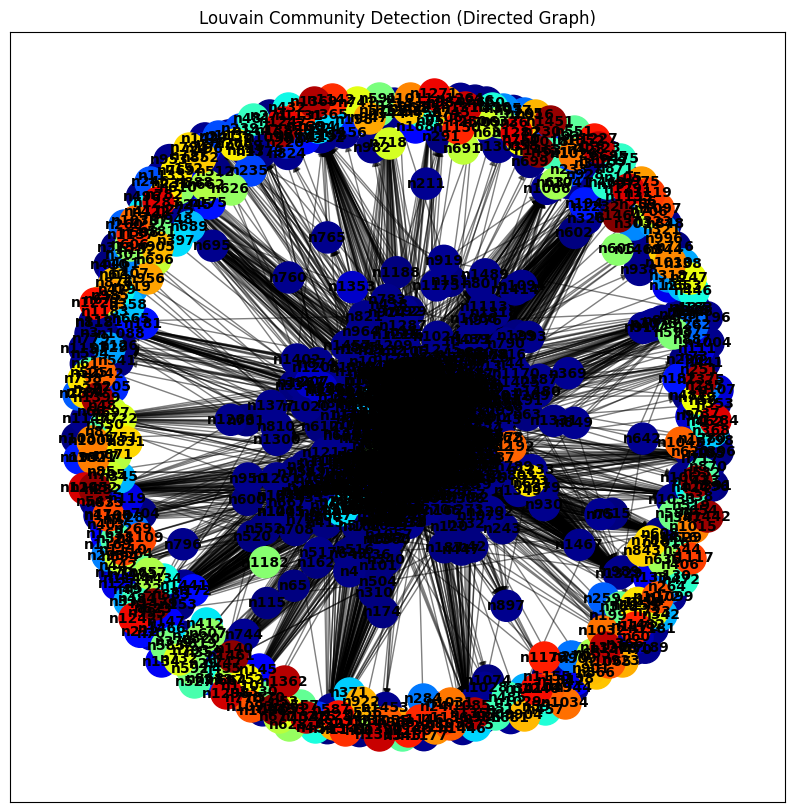

In [28]:
import xml.etree.ElementTree as ET
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# Function to apply the Louvain algorithm for community detection in a directed graph
def louvain_community_detection_directed(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Create a NetworkX directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = root.findall(".//graphml:node", namespaces)
    for node in nodes:
        node_id = node.get('id')
        G.add_node(node_id)

    # Add directed edges to the graph
    edges = root.findall(".//graphml:edge", namespaces)
    for edge in edges:
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)

    # Apply Louvain community detection
    partition = community_louvain.best_partition(G.to_undirected())  # Convert to undirected for Louvain

    # Print the community for each node
    print("Node to Community Mapping:")
    for node, community in partition.items():
        print(f"Node {node} is in community {community}")

    # Draw the directed graph with communities
    pos = nx.spring_layout(G)  # Layout to position nodes
    plt.figure(figsize=(10, 10))

    # Set color for each community
    communities = set(partition.values())
    colors = [plt.cm.jet(i / float(len(communities) - 1)) for i in range(len(communities))]

    for community in communities:
        node_list = [node for node, comm in partition.items() if comm == community]
        nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color=[colors[community] for _ in node_list], node_size=500)

    nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    plt.title("Louvain Community Detection (Directed Graph)")
    plt.show()

# Example usage
file_path = 'network.xml'
louvain_community_detection_directed(file_path)


Communities detected by Label Propagation:
Community 1: {'n258', 'n289', 'n372', 'n554', 'n143', 'n535', 'n644', 'n103', 'n315', 'n702', 'n651', 'n518', 'n378', 'n469', 'n278', 'n222', 'n165', 'n69', 'n314', 'n634', 'n505', 'n504', 'n199', 'n493', 'n408', 'n683', 'n728', 'n572', 'n510', 'n685', 'n109', 'n658', 'n74', 'n550', 'n675', 'n99', 'n346', 'n450', 'n361', 'n55', 'n242', 'n669', 'n589', 'n673', 'n139', 'n148', 'n401', 'n416', 'n724', 'n27', 'n255', 'n561', 'n298', 'n710', 'n95', 'n543', 'n91', 'n625', 'n569', 'n754', 'n602', 'n647', 'n26', 'n247', 'n5', 'n292', 'n245', 'n51', 'n166', 'n42', 'n488', 'n435', 'n115', 'n209', 'n476', 'n381', 'n604', 'n701', 'n237', 'n426', 'n36', 'n218', 'n307', 'n627', 'n9', 'n141', 'n676', 'n304', 'n154', 'n216', 'n707', 'n14', 'n910', 'n366', 'n500', 'n452', 'n465', 'n15', 'n703', 'n721', 'n736', 'n272', 'n31', 'n108', 'n254', 'n445', 'n523', 'n273', 'n574', 'n98', 'n296', 'n45', 'n403', 'n639', 'n88', 'n85', 'n590', 'n184', 'n131', 'n729', 'n84'

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


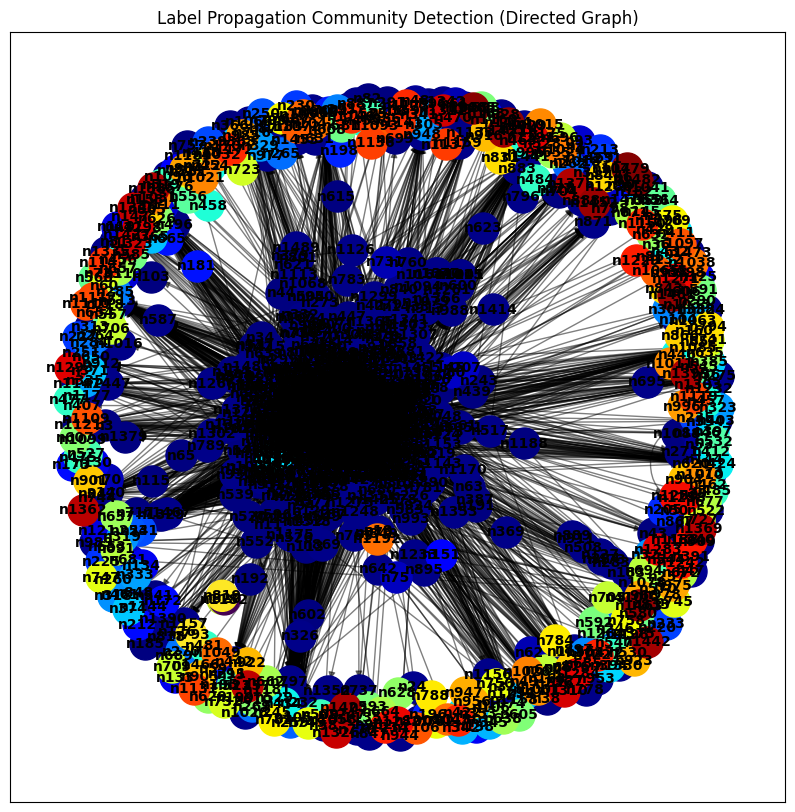

In [42]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities

# Function to apply Label Propagation for community detection
def label_propagation_community_detection(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Create a NetworkX directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = root.findall(".//graphml:node", namespaces)
    for node in nodes:
        node_id = node.get('id')
        G.add_node(node_id)

    # Add directed edges to the graph
    edges = root.findall(".//graphml:edge", namespaces)
    for edge in edges:
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)

    # Apply Label Propagation community detection (using an undirected version of the graph)
    # Convert to undirected for label propagation
    communities = label_propagation_communities(G.to_undirected())

    # Print the communities found
    print("Communities detected by Label Propagation:")
    for i, community in enumerate(communities):
        print(f"Community {i + 1}: {community}")

    # Draw the graph with communities
    pos = nx.spring_layout(G)  # Layout to position nodes
    plt.figure(figsize=(10, 10))

    # Color nodes according to their community
    community_colors = list(communities)
    for i, community in enumerate(community_colors):
        node_list = list(community)
        nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color=plt.cm.jet(i / len(community_colors)), node_size=500)

    nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    plt.title("Label Propagation Community Detection (Directed Graph)")
    plt.show()

# Example usage
file_path = 'network.xml'
label_propagation_community_detection(file_path)


In [43]:
import xml.etree.ElementTree as ET
import networkx as nx
import pandas as pd
from networkx.algorithms.community import label_propagation_communities

# Function to apply Label Propagation and save the results to an Excel file
def label_propagation_to_excel(file_path, output_excel):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespaces to ensure correct element search
    namespaces = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}

    # Create a NetworkX directed graph object
    G = nx.DiGraph()

    # Add nodes to the graph
    nodes = root.findall(".//graphml:node", namespaces)
    for node in nodes:
        node_id = node.get('id')
        G.add_node(node_id)

    # Add directed edges to the graph
    edges = root.findall(".//graphml:edge", namespaces)
    for edge in edges:
        source = edge.get('source')
        target = edge.get('target')
        G.add_edge(source, target)

    # Apply Label Propagation community detection (using an undirected version of the graph)
    communities = label_propagation_communities(G.to_undirected())

    # Prepare data for DataFrame: List of nodes and their community labels
    community_data = []

    for community_id, community in enumerate(communities, 1):
        for node in community:
            community_data.append([node, community_id])

    # Create DataFrame with Node and Community columns
    df = pd.DataFrame(community_data, columns=['Node', 'Community'])

    # Save the DataFrame to an Excel file
    df.to_excel(output_excel, index=False)

    print(f"Label Propagation community results saved to {output_excel}")

# Example usage
file_path = 'network.xml'
output_excel = 'label_propagation_community_results.xlsx'
label_propagation_to_excel(file_path, output_excel)


Label Propagation community results saved to label_propagation_community_results.xlsx
